In [1]:
from kervis.utils import Model, Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, GraphletSampling, WeisfeilerLehman

/Users/congrendai/miniconda3/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/congrendai/miniconda3/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_orde

In [2]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()

In [3]:
VH_MUTAG = Model(VH, Dataset('MUTAG'), 'xgboost')
EH_MUTAG = Model(EH, Dataset('MUTAG'), 'xgboost')
SP_MUTAG = Model(SP, Dataset('MUTAG'), 'xgboost')

In [4]:
VH_MUTAG.evaluate()
EH_MUTAG.evaluate()
SP_MUTAG.evaluate()

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.88      0.88      0.88        26

    accuracy                           0.84        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.84      0.84      0.84        38

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.92      0.88      0.90        26

    accuracy                           0.87        38
   macro avg       0.84      0.86      0.85        38
weighted avg       0.87      0.87      0.87        38

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.85      0.85      0.85        26

    accuracy                           0.79        38
   macro avg       0.76      0.76      0.76        38
weighted avg       0.79      0.79      0.79        38



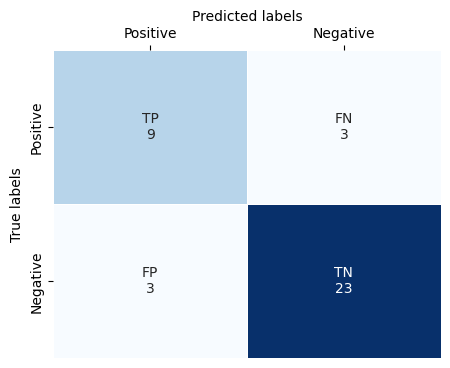

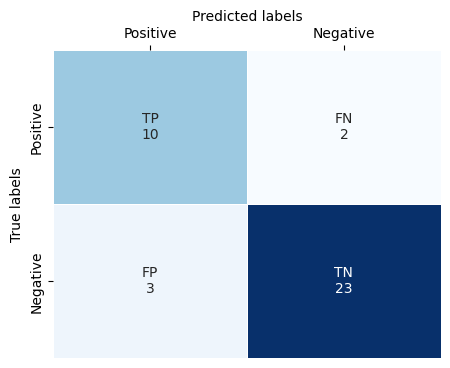

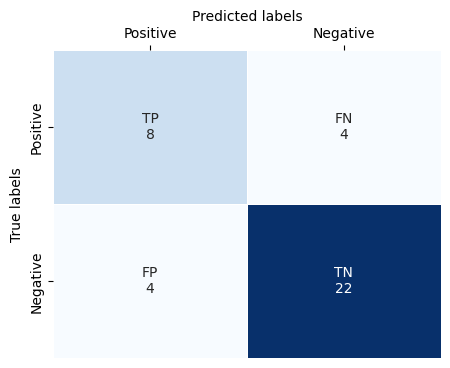

In [5]:
VH_MUTAG.evaluator.confusion_matrix()
EH_MUTAG.evaluator.confusion_matrix()
SP_MUTAG.evaluator.confusion_matrix()

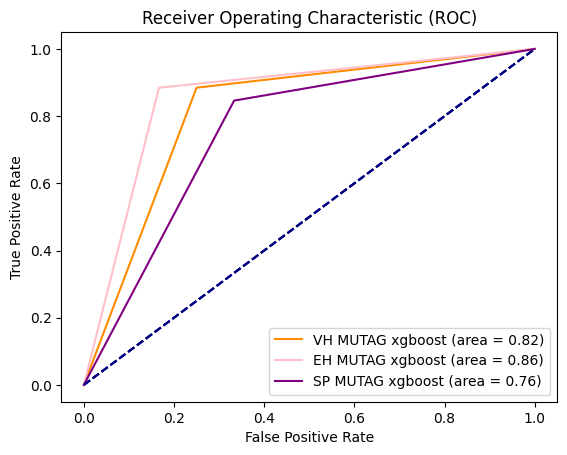

In [6]:
VH_MUTAG.evaluator.roc_curve()
EH_MUTAG.evaluator.roc_curve("pink")
SP_MUTAG.evaluator.roc_curve("purple")

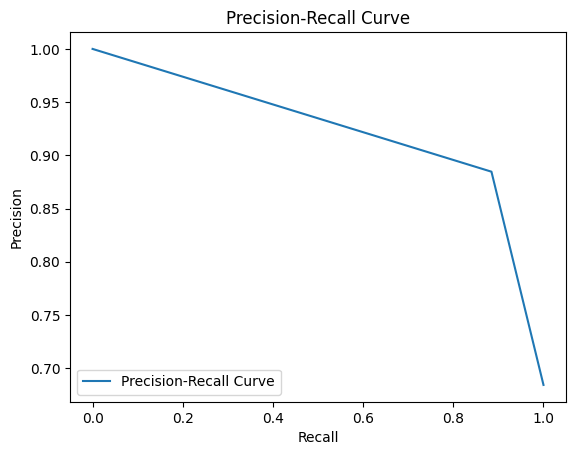

In [8]:
VH_MUTAG.evaluator.precision_recall_curve()

In [ ]:
VH_AIDS = Model(VH, Dataset('AIDS'), 'xgboost')
EH_AIDS = Model(EH, Dataset('AIDS'), 'xgboost')
SP_AIDS = Model(SP, Dataset('AIDS'), 'xgboost')

In [ ]:
VH_AIDS.evaluate()
EH_AIDS.evaluate()
SP_AIDS.evaluate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       319

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       319

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       1.00      1.00      1.00       319

    accuracy                           1.00       400
   macro avg       1.00      0.99      1.00       400
weighted avg       1.00      1.00      1.00       400

